In [7]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pyexcel_xlsx
%pylab inline
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from pandas.plotting import scatter_matrix

Populating the interactive namespace from numpy and matplotlib


In [8]:
pylab.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25, 'lines.markersize' : 15, 'xtick.labelsize': 20, 'ytick.labelsize': 20 })#,'font.family': 'serif'})
rc('axes', linewidth=3)
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator


In [9]:
data = pd.read_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/master_df_20191021.xlsx")
df = pd.DataFrame(data)
df = df.set_index(['FIPS'])
df.drop(['cat_3q', 'cat_4q','O_Ind', 'R_I_No0_NoO', 'R_I_NoO', 'R_Ind'], axis=1, inplace=True)


In [10]:
df.dropna(inplace=True)

In [11]:
df.head()

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,Count_,StrVI,SeVI,Str+SeVI,SoVI,DG_mean_m,R_I_No0
FIPS,,,,,,,,,,,,,,
72001956400,0.03,0.02,2.00,2.72,0.27,43.81,33.98,1854,7.84,-7.49,0.35,-14.31,2.57,0.017260
72001956500,0.01,0.00,1.88,0.00,0.29,43.36,33.98,1833,5.42,-13.13,-7.71,-8.48,0.00,0.007092
72001956800,0.01,0.00,1.96,0.00,0.26,43.81,33.98,2528,5.90,-5.07,0.84,-8.41,0.00,0.028481
72003430100,0.56,0.52,1.17,6.64,0.27,38.00,30.40,2369,4.36,4.08,8.44,-0.53,2.26,0.036724
72003430200,0.38,0.43,1.00,4.51,0.27,38.00,30.40,2141,6.97,11.14,18.11,-0.03,3.00,0.017749


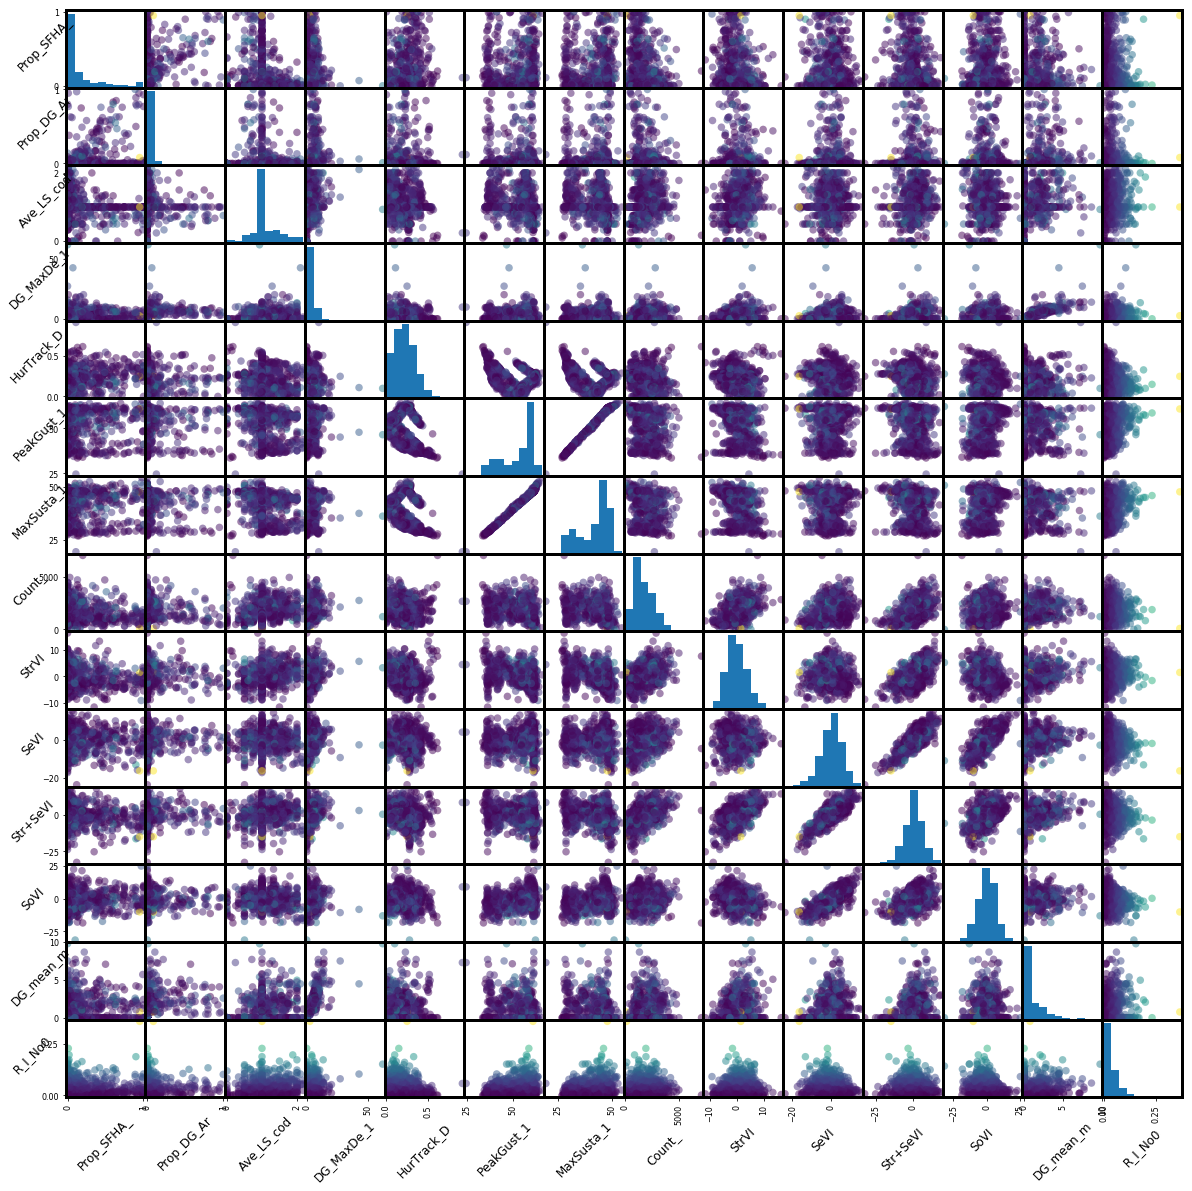

In [12]:
scatter_matrix = scatter_matrix(df, c=df['R_I_No0'], figsize = [20,20])
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 12, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 12, rotation = 45)

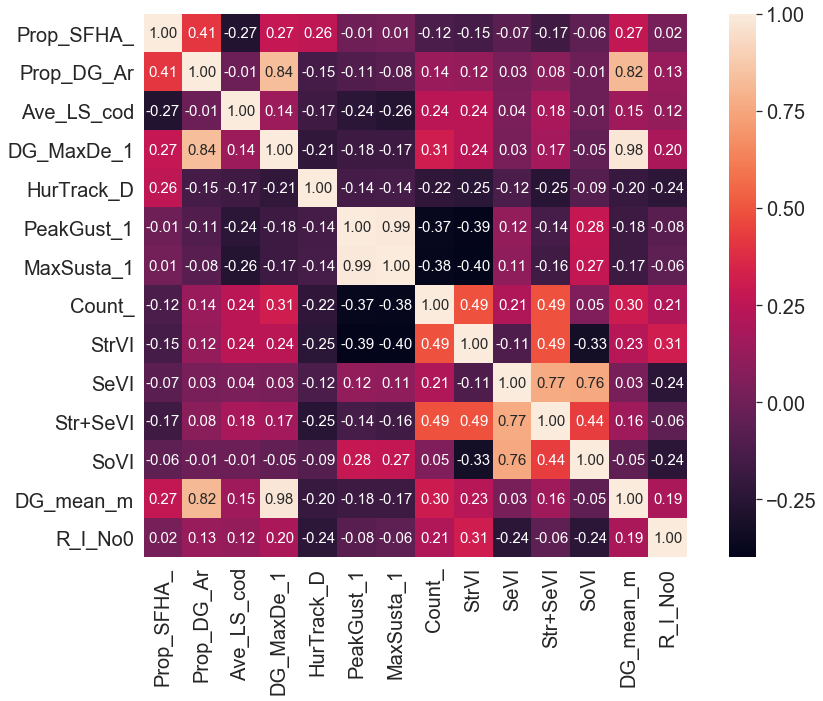

In [169]:
hm = sns.heatmap(df.corr(method = 'spearman'),
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15})

plt.show()

In [126]:
#df.describe()

In [127]:
#boxplot = df.boxplot(column=['Prop_SFHA_', 'Prop_DG_Ar'])

In [128]:
#boxplot = df.boxplot(column=['DG_MaxDe_1'])

In [129]:
#boxplot = df.boxplot(column=['HurTrack_D'])

In [130]:
#boxplot = df.boxplot(column=['PeakGust_1', 'MaxSusta_1'])

In [131]:
#boxplot = df.boxplot(column=['StrVI', 'SeVI', 'Str+SeVI', 'SoVI'])

In [132]:
for col in df.columns:
    print(col)

Prop_SFHA_
Prop_DG_Ar
Ave_LS_cod
DG_MaxDe_1
HurTrack_D
PeakGust_1
MaxSusta_1
Count_
StrVI
SeVI
Str+SeVI
SoVI
DG_mean_m
R_Ind


## This plot is a correlation matrix, show's Pearson Product Moment Correlation Coeffcient, aka "Pearson's r", linear dependence b/w pairs of features. -1 = perfectly negatively correlated, 0 is no correlation, 1 is perfectly positively correlated

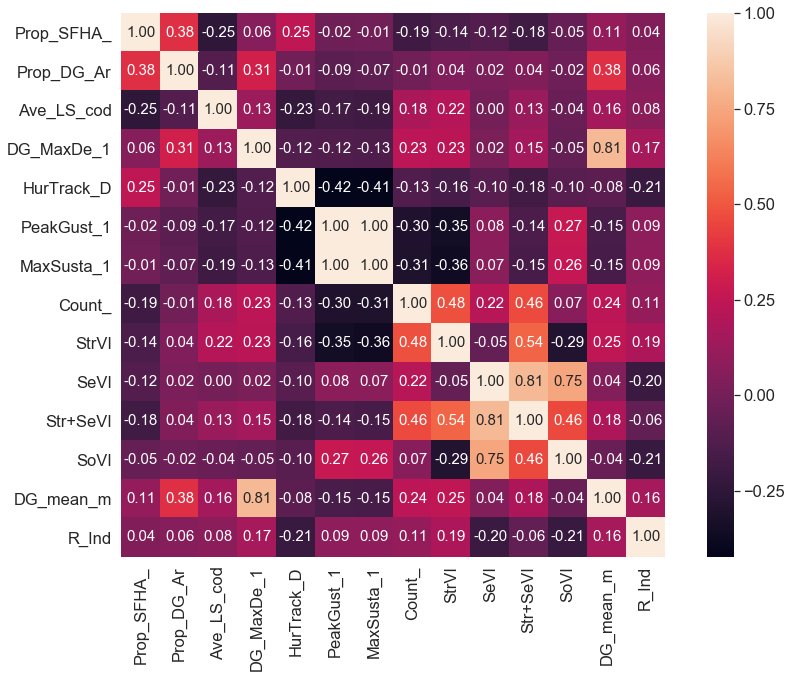

In [136]:
cols = ['Prop_SFHA_','Prop_DG_Ar','Ave_LS_cod','DG_MaxDe_1','HurTrack_D','PeakGust_1','MaxSusta_1','Count_','StrVI','SeVI','Str+SeVI','SoVI', 'DG_mean_m', "R_Ind"]
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels = cols,
                xticklabels = cols)
plt.show()

## Table of Pearson correlations

In [139]:
df.corr(method = 'pearson')

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,Count_,StrVI,SeVI,Str+SeVI,SoVI,DG_mean_m,R_Ind
Prop_SFHA_,1.000000,0.377799,-0.249292,0.058723,0.246497,-0.024920,-0.006532,-0.187096,-0.141360,-0.115384,-0.179815,-0.048664,0.105462,0.039645
Prop_DG_Ar,0.377799,1.000000,-0.111547,0.313675,-0.008071,-0.087815,-0.067151,-0.007932,0.036643,0.020860,0.038944,-0.017294,0.381298,0.059920
Ave_LS_cod,-0.249292,-0.111547,1.000000,0.128376,-0.226766,-0.168908,-0.188781,0.179523,0.215025,0.002528,0.127624,-0.035462,0.155926,0.076314
DG_MaxDe_1,0.058723,0.313675,0.128376,1.000000,-0.118603,-0.122414,-0.128000,0.233414,0.231299,0.022922,0.154249,-0.051703,0.814829,0.166542
HurTrack_D,0.246497,-0.008071,-0.226766,-0.118603,1.000000,-0.422403,-0.413260,-0.127481,-0.159025,-0.098203,-0.175640,-0.095987,-0.083345,-0.210535
PeakGust_1,-0.024920,-0.087815,-0.168908,-0.122414,-0.422403,1.000000,0.997301,-0.300541,-0.352692,0.081706,-0.136759,0.273479,-0.147610,0.086038
MaxSusta_1,-0.006532,-0.067151,-0.188781,-0.128000,-0.413260,0.997301,1.000000,-0.308262,-0.362688,0.070239,-0.152267,0.261577,-0.153598,0.092276
Count_,-0.187096,-0.007932,0.179523,0.233414,-0.127481,-0.300541,-0.308262,1.000000,0.478882,0.218031,0.463302,0.065616,0.237795,0.110573
StrVI,-0.141360,0.036643,0.215025,0.231299,-0.159025,-0.352692,-0.362688,0.478882,1.000000,-0.053245,0.538318,-0.293377,0.249731,0.188350
SeVI,-0.115384,0.020860,0.002528,0.022922,-0.098203,0.081706,0.070239,0.218031,-0.053245,1.000000,0.812883,0.748472,0.044607,-0.204946


## Table of Spearman Correlations

The difference between standard Pearson’s correlation is that this one first transforms variables into ranks and only then runs Pearson’s correlation on the ranks.

Spearman’s correlation: 
- is nonparametric 
- does not assume a linear relationship between variables 
- it looks for monotonic relationships

In [140]:
df.corr(method = 'spearman')

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,Count_,StrVI,SeVI,Str+SeVI,SoVI,DG_mean_m,R_Ind
Prop_SFHA_,1.000000,0.414889,-0.261651,0.282260,0.252505,-0.036746,-0.016929,-0.114124,-0.114157,-0.060582,-0.143904,-0.059782,0.276054,0.028139
Prop_DG_Ar,0.414889,1.000000,-0.023385,0.842642,-0.110686,-0.130986,-0.106624,0.163161,0.139643,0.011173,0.079041,-0.014966,0.824889,0.127553
Ave_LS_cod,-0.261651,-0.023385,1.000000,0.123787,-0.216424,-0.235558,-0.257391,0.245249,0.236938,0.018579,0.164549,-0.020874,0.135707,0.058510
DG_MaxDe_1,0.282260,0.842642,0.123787,1.000000,-0.177224,-0.196178,-0.187316,0.329499,0.247833,0.003743,0.148759,-0.047834,0.980880,0.169587
HurTrack_D,0.252505,-0.110686,-0.216424,-0.177224,1.000000,-0.176341,-0.172786,-0.209203,-0.234549,-0.103064,-0.228215,-0.088726,-0.169130,-0.218276
PeakGust_1,-0.036746,-0.130986,-0.235558,-0.196178,-0.176341,1.000000,0.993545,-0.381611,-0.389492,0.102239,-0.156012,0.239589,-0.192996,-0.006846
MaxSusta_1,-0.016929,-0.106624,-0.257391,-0.187316,-0.172786,0.993545,1.000000,-0.390894,-0.401220,0.092986,-0.172924,0.231551,-0.184902,0.010500
Count_,-0.114124,0.163161,0.245249,0.329499,-0.209203,-0.381611,-0.390894,1.000000,0.478140,0.196452,0.482302,0.074673,0.314984,0.207772
StrVI,-0.114157,0.139643,0.236938,0.247833,-0.234549,-0.389492,-0.401220,0.478140,1.000000,-0.131789,0.476410,-0.320226,0.237880,0.227299
SeVI,-0.060582,0.011173,0.018579,0.003743,-0.103064,0.102239,0.092986,0.196452,-0.131789,1.000000,0.768326,0.754726,-0.002780,-0.173706


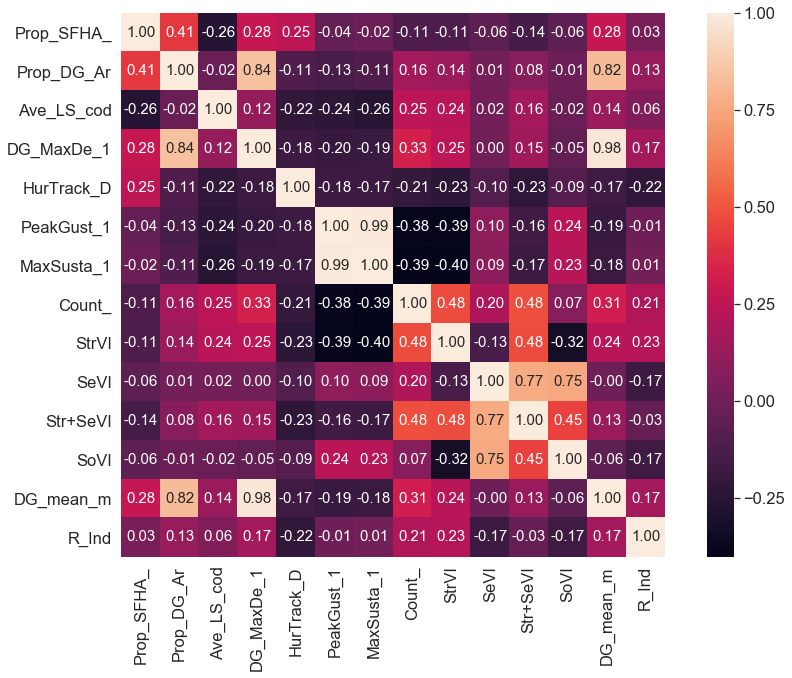

In [141]:
hm = sns.heatmap(df.corr(method = 'spearman'),
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels = cols,
                xticklabels = cols)
plt.show()

## Add in Mean DG Value

In [125]:
data2 = pd.read_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/DG_Zonal_Stats.xlsx")
df_DG = pd.DataFrame(data2)

In [126]:
for col in df_DG.columns:
    print(col)

Rowid_
FIPS
ZONE_CODE
COUNT
AREA
MIN
MAX
RANGE
MEAN
STD
SUM


In [127]:
df_DG.head()

,Rowid_,FIPS,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
0,NaN,72097081512,1,317767,8.551039e+07,0.000843,32.123077,32.122234,23.794818,3.718644,7.561208e+06
1,NaN,72023830102,6,258934,6.967856e+07,0.000076,31.494505,31.494429,16.557520,5.728721,4.287305e+06
2,NaN,72023830200,7,193271,5.200880e+07,0.000072,28.303806,28.303734,11.823447,6.960121,2.285129e+06
3,NaN,72023830300,8,1975,5.314681e+05,0.001213,4.896801,4.895588,1.453788,1.015288,2.871232e+03
4,NaN,72023830400,9,91323,2.457482e+07,0.000408,30.329470,30.329062,14.759861,8.525876,1.347915e+06


In [128]:
df_DG = df_DG.set_index(['FIPS'])

In [129]:
df_DG.head()

,Rowid_,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
FIPS,,,,,,,,,,
72097081512,NaN,1,317767,8.551039e+07,0.000843,32.123077,32.122234,23.794818,3.718644,7.561208e+06
72023830102,NaN,6,258934,6.967856e+07,0.000076,31.494505,31.494429,16.557520,5.728721,4.287305e+06
72023830200,NaN,7,193271,5.200880e+07,0.000072,28.303806,28.303734,11.823447,6.960121,2.285129e+06
72023830300,NaN,8,1975,5.314681e+05,0.001213,4.896801,4.895588,1.453788,1.015288,2.871232e+03
72023830400,NaN,9,91323,2.457482e+07,0.000408,30.329470,30.329062,14.759861,8.525876,1.347915e+06


In [130]:
df2 = df.join(df_DG)

In [131]:
for col in df2.columns:
    print(col)

Prop_SFHA_
Prop_DG_Ar
Ave_LS_cod
DG_MaxDe_1
HurTrack_D
PeakGust_1
MaxSusta_1
DMG_Index
Count_
StrVI
SeVI
Str+SeVI
SoVI
Rowid_
ZONE_CODE
COUNT
AREA
MIN
MAX
RANGE
MEAN
STD
SUM


In [132]:
df2 = df2.drop(['Rowid_','ZONE_CODE','COUNT','AREA','MIN','MAX','RANGE','STD','SUM'], axis=1)

In [133]:
df2.head()

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,DMG_Index,Count_,StrVI,SeVI,Str+SeVI,SoVI,MEAN
FIPS,,,,,,,,,,,,,,
72001956300,0.02,0.00,2.00,0.00,0.24,44.26,34.87,0.01,2414,3.07,-8.41,-5.35,-9.44,NaN
72001956400,0.03,0.02,2.00,2.72,0.27,43.81,33.98,1.78,1854,7.84,-7.49,0.35,-14.31,8.427649
72001956500,0.01,0.00,1.88,0.00,0.29,43.36,33.98,0.71,1833,5.42,-13.13,-7.71,-8.48,NaN
72001956600,0.05,0.00,1.80,0.00,0.26,43.81,34.42,0.01,698,1.21,-7.72,-6.51,-7.78,NaN
72001956700,0.10,0.00,2.00,0.00,0.26,43.81,34.42,0.01,790,1.30,-6.66,-5.35,-6.12,NaN


In [134]:
df2.MEAN.fillna(0, inplace=True)

In [135]:
df2.rename(columns={"MEAN":"DG_mean"}, inplace=True)

In [136]:
df2['DG_mean_m'] = df2.DG_mean.values / 3.2808

In [137]:
df2

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,DMG_Index,Count_,StrVI,SeVI,Str+SeVI,SoVI,DG_mean,DG_mean_m
FIPS,,,,,,,,,,,,,,,
72001956300,0.02,0.00,2.00,0.00,0.24,44.26,34.87,0.01,2414,3.07,-8.41,-5.35,-9.44,0.000000,0.000000
72001956400,0.03,0.02,2.00,2.72,0.27,43.81,33.98,1.78,1854,7.84,-7.49,0.35,-14.31,8.427649,2.568779
72001956500,0.01,0.00,1.88,0.00,0.29,43.36,33.98,0.71,1833,5.42,-13.13,-7.71,-8.48,0.000000,0.000000
72001956600,0.05,0.00,1.80,0.00,0.26,43.81,34.42,0.01,698,1.21,-7.72,-6.51,-7.78,0.000000,0.000000
72001956700,0.10,0.00,2.00,0.00,0.26,43.81,34.42,0.01,790,1.30,-6.66,-5.35,-6.12,0.000000,0.000000
72001956800,0.01,0.00,1.96,0.00,0.26,43.81,33.98,2.85,2528,5.90,-5.07,0.84,-8.41,0.000000,0.000000
72003430100,0.56,0.52,1.17,6.64,0.27,38.00,30.40,3.76,2369,4.36,4.08,8.44,-0.53,7.415479,2.260266
72003430200,0.38,0.43,1.00,4.51,0.27,38.00,30.40,1.77,2141,6.97,11.14,18.11,-0.03,9.851787,3.002861
72003430300,0.20,0.00,1.00,0.00,0.29,37.55,30.40,2.04,1125,4.92,8.36,13.28,-3.72,0.000000,0.000000


In [148]:
df2 = df2.round(2)

In [139]:
df2 = df2.drop(['DG_mean'], axis=1)

In [140]:
df2.head()

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,DMG_Index,Count_,StrVI,SeVI,Str+SeVI,SoVI,DG_mean_m
FIPS,,,,,,,,,,,,,,
72001956300,0.02,0.00,2.00,0.00,0.24,44.26,34.87,0.01,2414,3.07,-8.41,-5.35,-9.44,0.00
72001956400,0.03,0.02,2.00,2.72,0.27,43.81,33.98,1.78,1854,7.84,-7.49,0.35,-14.31,2.57
72001956500,0.01,0.00,1.88,0.00,0.29,43.36,33.98,0.71,1833,5.42,-13.13,-7.71,-8.48,0.00
72001956600,0.05,0.00,1.80,0.00,0.26,43.81,34.42,0.01,698,1.21,-7.72,-6.51,-7.78,0.00
72001956700,0.10,0.00,2.00,0.00,0.26,43.81,34.42,0.01,790,1.30,-6.66,-5.35,-6.12,0.00


Pearson Correlation Matrix

-1 = perfectly negatively correlated \
0 = no correlation \
1 = perfectly positively correlated \

Assumes linearity and normal and parametric though

In [116]:
cols = ['Prop_SFHA_','Prop_DG_Ar','Ave_LS_cod','DG_MaxDe_1', 'DG_mean_m','HurTrack_D','PeakGust_1','MaxSusta_1','Count_','StrVI','SeVI','Str+SeVI','SoVI', 'DMG_Index']
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels = cols,
                xticklabels = cols)
plt.show()

NameError: name 'df2' is not defined

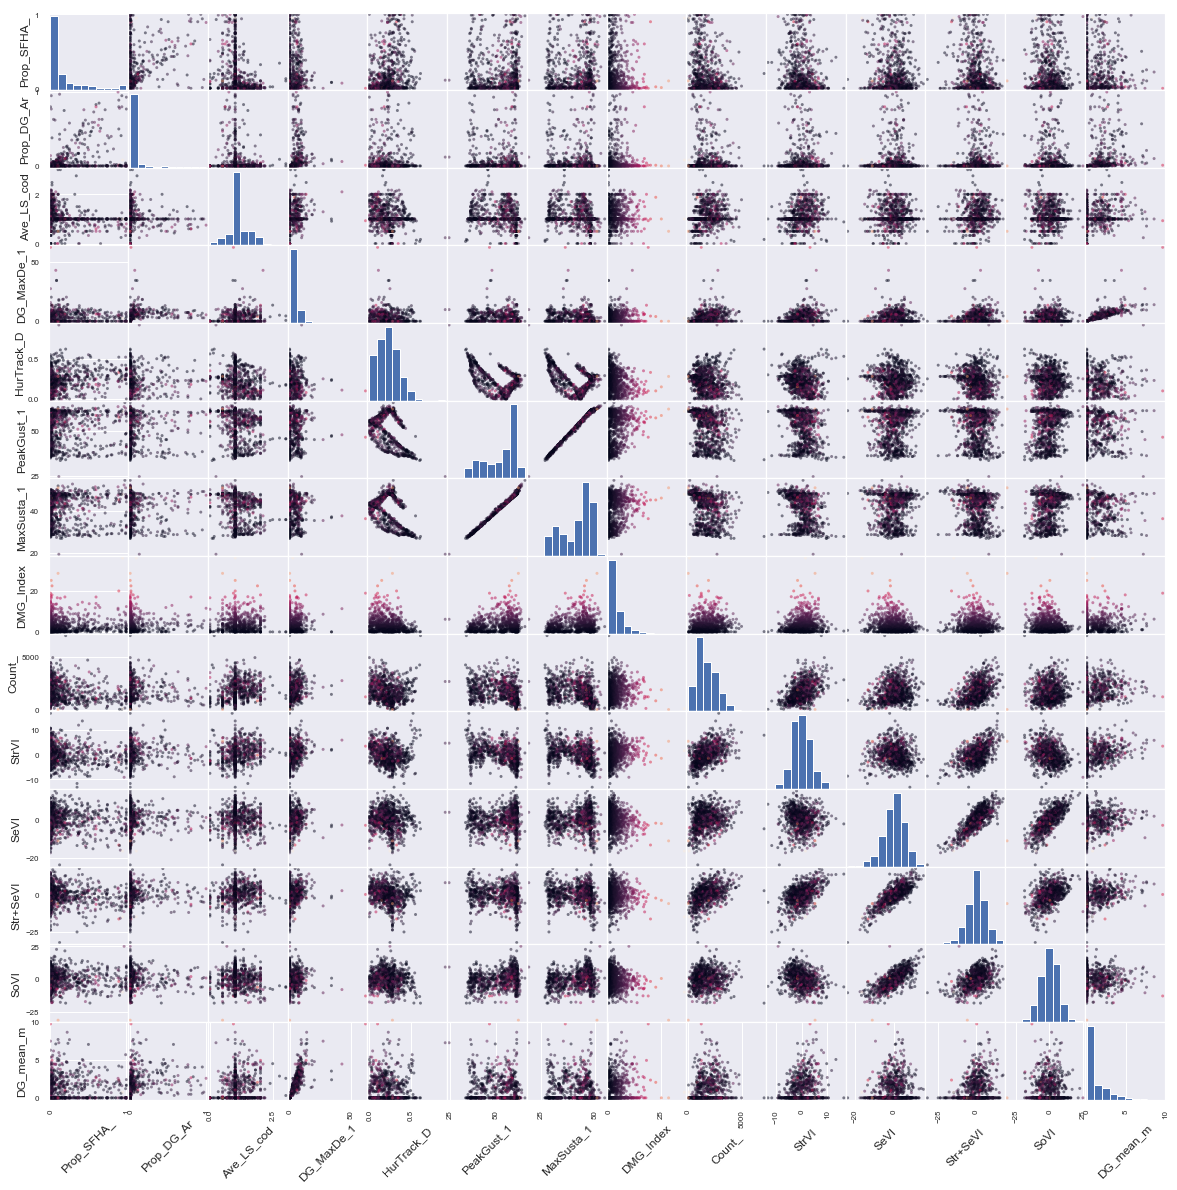

In [142]:
scatter_matrix = scatter_matrix(df2, c=df2['DMG_Index'], figsize = [20,20])
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 12, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 12, rotation = 90)

# Export to Excel

In [143]:
df2 = df2.drop(['DMG_Index'], axis=1)

In [144]:
df2

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,Count_,StrVI,SeVI,Str+SeVI,SoVI,DG_mean_m
FIPS,,,,,,,,,,,,,
72001956300,0.02,0.00,2.00,0.00,0.24,44.26,34.87,2414,3.07,-8.41,-5.35,-9.44,0.00
72001956400,0.03,0.02,2.00,2.72,0.27,43.81,33.98,1854,7.84,-7.49,0.35,-14.31,2.57
72001956500,0.01,0.00,1.88,0.00,0.29,43.36,33.98,1833,5.42,-13.13,-7.71,-8.48,0.00
72001956600,0.05,0.00,1.80,0.00,0.26,43.81,34.42,698,1.21,-7.72,-6.51,-7.78,0.00
72001956700,0.10,0.00,2.00,0.00,0.26,43.81,34.42,790,1.30,-6.66,-5.35,-6.12,0.00
72001956800,0.01,0.00,1.96,0.00,0.26,43.81,33.98,2528,5.90,-5.07,0.84,-8.41,0.00
72003430100,0.56,0.52,1.17,6.64,0.27,38.00,30.40,2369,4.36,4.08,8.44,-0.53,2.26
72003430200,0.38,0.43,1.00,4.51,0.27,38.00,30.40,2141,6.97,11.14,18.11,-0.03,3.00
72003430300,0.20,0.00,1.00,0.00,0.29,37.55,30.40,1125,4.92,8.36,13.28,-3.72,0.00


In [146]:
df2.to_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/AllFeatures20191021.xlsx")